**Azalea Yunus and Benji Andrews**

Fall 2020

CS343: Neural Networks

Project 1: Single-layer networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Goals

In this project, you will implement single-layer neural networks that includes the same fundamental components as larger multi-level networks.

**The goals are to:**

- Get familar with Jupyter notebooks, Numpy arrays, Pandas.
- Get familar with the workflow for preprocessing data, training a neural network, evaluating test data, and examining performance metrics.
- Analyze and visualize the decision boundaries formed by single-layer networks.
- Use a similar neural network architecture for classification and for regression.
- Work with multiple datasets.

### Reminders

- In this class, use `numpy ndarray` (`np.array()`), not Numpy Matrix.
- To help safeguard against data loss when working in a jupyter notebook, make sure the notebook is `Trusted` (Top right corner of notebook). This will ensure your work autosaves. **I still recommend manually saving at least every few minutes with (Control+S / Cmd+S)**

## Task 1: Implement the ADAptive LInear NEuron (ADALINE) network for binary classification

In Task 1, complete the methods of the `Adaline` class in `adaline.py`. This includes:

- `net_input(self, features)`
- `activation(self, net_in)`
- `compute_loss(self, errors)`
- `compute_accuracy(self, y, y_pred)`
- `gradient(self, errors, features)`

- `predict(self, features)`
- `fit(self, features, y, n_epochs, lr)`

**Important:** Before starting, read through the method descriptions and expected inputs/outputs. It probabily woud be a good idea to tackle simpler/smaller methods first, then use them in more complex ones. For example, it may be a good idea to work on `net_input` first because it is required to complete `fit`. There is test code below.

Here is a summary of the ADALINE network equations

##### Net input

$\vec{x}_i$ is one of the $N$ data sample vectors from the dataset matrix $A$. That is, `x_i.shape = (M,)`.

$$\text{netIn}_i = \sum_{j=1}^M x_{ij} w_j + b$$

##### Net activation

$$f(z_i) = z_i$$

##### Loss: Sum of squared error

$$L(\vec{w}) = \frac{1}{2} \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )^2 $$

##### Gradient (bias)

$$\frac{\partial L}{\partial b} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )$$

##### Gradient (wts)

Below, $x_{ij}$ is the $j^{th}$ feature of the data sample vector $\vec{x}_i$.

$$\frac{\partial L}{\partial w_j} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right ) x_{ij}$$

##### Gradient descent (delta rule)

$$b(t+1) = b(t) - \eta \frac{\partial L}{\partial b}$$
$$w_j(t+1) = w_j(t) - \eta \frac{\partial L}{\partial w_j}$$

above $\eta$ is the learning rate, and $N$ is the training set (number of data samples in training epoch).

### 1a. Test your ADALINE implementation

In [3]:
net = Adaline()

#### Test `loss` function

In [4]:
np.random.seed(0)
randErrors = np.array([-0.835,  0.322, -0.381,  0.496, -0.89 , -0.953])
net_act = np.random.rand(len(randErrors))
debugLoss = net.compute_loss(randErrors, net_act)
print(f'Your loss is {debugLoss} and it should be 3.6609344768925496')

Your loss is 3.6609344768925496 and it should be 3.6609344768925496


#### Test `accuracy` function

In [5]:
randClasses1 = np.where(randErrors >= 0, 1, -1)
randClasses2 = np.roll(randClasses1, 1)
acc1 = net.compute_accuracy(randClasses1, randClasses1)
acc2 = net.compute_accuracy(randClasses1, randClasses2)
print(f'Test 1: Your accuracy is {acc1} and it should be 1.0')
print(f'Test 2: Your accuracy is {acc2} and it should be 0.33333333333333337')

Test 1: Your accuracy is 1.0 and it should be 1.0
Test 2: Your accuracy is 0.3333333333333333 and it should be 0.33333333333333337


#### Test `gradient` function

In [6]:
np.random.seed(0)
randFeatures = np.random.normal(loc=0, scale=1, size=(10,3))
randErrors1 = np.random.normal(loc=0, scale=1, size=(10,))
randBiasGrad, randWtGrad = net.gradient(randErrors1, randFeatures)
print(f'Test 1: Your bias gradient is {randBiasGrad} and it should be 0.7839944892482784')
print(f'Test 2: Your wt gradient is {randWtGrad} and it should be [ 0.4   -0.897  7.689]')

Test 1: Your bias gradient is 0.7839944892482784 and it should be 0.7839944892482784
Test 2: Your wt gradient is [ 0.4   -0.897  7.689] and it should be [ 0.4   -0.897  7.689]


#### Test `predict` function

In [7]:
np.random.seed(0)
inputs = np.random.randn(10, 5)
net.wts = np.random.randn(6)
y_pred = net.predict(inputs)
print(f'Your predicted classes are {y_pred}.\n            They should be [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]')

Your predicted classes are [-1. -1. -1. -1. -1. -1. -1. -1.  1. -1.].
            They should be [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]


#### Test `fit` function

In [8]:
np.random.seed(0)
net = Adaline()
inputs = np.random.randn(10, 5)
y = np.sign(np.random.randn(10))
loss, acc = net.fit(inputs, y)
print(f'Your end-of-training loss / accuracy are\n{loss[-1]} / {acc[-1]}.\nThey should be\n3.944874887550384 / 0.6')
print(f'Your wts after training are:\n{net.get_wts()}\nand should be\n[-0.298 -0.033  0.33  -0.382 -0.192  0.087]')

Your end-of-training loss / accuracy are
3.9448748875503834 / 0.6.
They should be
3.944874887550384 / 0.6
Your wts after training are:
[-0.298 -0.033  0.33  -0.382 -0.192  0.087]
and should be
[-0.298 -0.033  0.33  -0.382 -0.192  0.087]


### 1b. Load in and preprocess old faithful data

Write code to do the following in the below cell.

- Load in `old_faithful.csv`, represent data using a ndarray. Shape = [Num samps, Num features] = [272, 2].
- Assign the output classes (**severe**) to a separate 1D ndarray vector. Shape=(272,)
- Preprocess the data by normalizing by the global maximum. I.e. the max value over all features in the transformed dataset should be 1.0. Stated a different way, only one feature component of one data sample vector equals 1.0, everything else is smaller, but still $>=$ 0.
- Use matplotlib to create a scatter plot of the normalized data, color-coding data points according to their class
- I suggest using pandas, but you're welcome to do this however you like.
- **Make sure that executing the below cell results in an inline scatter plot, color-coded by class.**

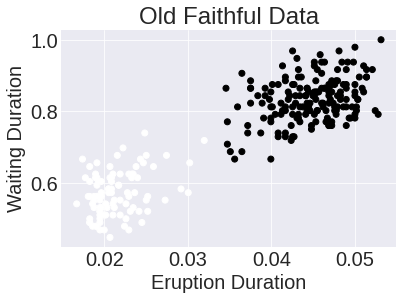

In [29]:
#loading in old faithful data
old_faith = pd.read_csv('data/old_faithful.csv')
of_outputs = old_faith["severe"].to_numpy()
old_faith = old_faith.drop(['sample','severe'],axis=1).to_numpy()
#NOTE: i am pretty sure this is normalized right.
old_faith = old_faith/np.max(old_faith)
plt.scatter(x=old_faith[:,0], y=old_faith[:,1], c=of_outputs)
plt.xlabel("Eruption Duration")
plt.ylabel("Waiting Duration")
plt.title("Old Faithful Data")
plt.savefig("oldfaith.png",bbox_inches="tight")
plt.show()

### 1c. Train ADALINE on normalized Old Faithful data using default hyperparameters (i.e. learning rate, epochs)

Print out the final loss and accuracy, then use the provided function to plot your training results inline in the below cell.

By the final epoch, training loss should reach ~23.74 and accuracy ~97%.

In [10]:
of_net = Adaline()
loss, acc = of_net.fit(old_faith, of_outputs)
print(f'The end-of-training loss / accuracy are\n{loss[-1]} / {acc[-1]}.')

The end-of-training loss / accuracy are
23.73733191756991 / 0.9742647058823529.


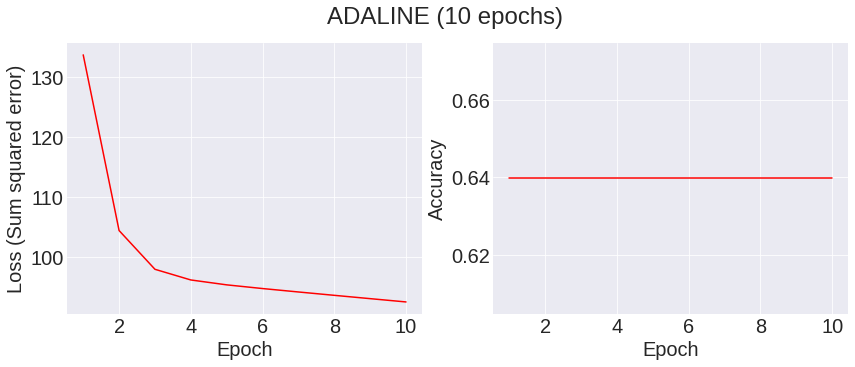

In [28]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.savefig("adaline_training",bbox_inches="tight")
    plt.show()
plot_adaline_train(net, loss, acc)

#### Questions

**Question 1.** Based on your loss and accuracy curves, does it look like your network learned to classify the old faithful data? Why or why not?

#### Answers

1. It looks like our network did learn to classify the old faithful data successfully, as a very high accuracy value was reached during the training period.

### 1d. Early stopping

A common practice to speed up training is to stop training early (before the prescribed number of epochs is completed) if the loss stops changing (within some criterion level). You will modify the `fit` training function to implement this feature.

Add two optional parameters to `fit`:
- `early_stopping=False`
- `loss_tol=0.1`

In this subtask, implement the following:
- if `early_stopping` is True, terminate the training process if the difference in loss between the previous and current epoch is `< loss_tol`. This means that the loss has converged before the pre-specified number of training epochs.
- Set the number of training epochs to be large (2000). Determine the number of epochs required for the loss to converge.

In [12]:
loss, acc = of_net.fit(old_faith, of_outputs, n_epochs=2000, early_stopping=True, loss_tol=0.1)
print(loss[-1])
print(f'Loss converged in {len(loss)} epochs')

37.88091914664534
Loss converged in 274 epochs


#### Questions

**Question 2.** How many epochs did it take to train the network with the early stopping tolerance of 0.1?

**Question 3.** At what approximate loss value does the network converge to when stopping early?

#### Answers

2. It took 274 epochs to train the network  with the early stopping tolerance of 0.1.

3. The loss converges to about 40. 

## Task 2: Feature scaling and convergence

**Important:** For this task, disable early stopping  in `fit`!

### 2a. Feature scaling

Copy your code from Task 1 to import the Old Faithful data, but this time don't normalize before training.

In [13]:
#loading in old faithful data
old_faith_nn = pd.read_csv('data/old_faithful.csv')
of_outputs_nn = old_faith_nn['severe'].to_numpy()
old_faith_nn = old_faith_nn.drop(['sample','severe'],axis=1).to_numpy()

#running UNnormalized of data through the net
of_net_nn = Adaline()
loss_nn, acc_nn = of_net_nn.fit(old_faith_nn, of_outputs_nn, lr=0.00001)
print(f'The end-of-training loss / accuracy are\n{loss_nn[-1]} / {acc_nn[-1]}.')

The end-of-training loss / accuracy are
nan / 0.0.


/home/benji/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/benji/colby/neural_networks/project1/adaline.py:73: RuntimeWarning: overflow encountered in square
  sse = 0.5 * np.sum((y - net_act) ** 2)
/home/benji/colby/neural_networks/project1/adaline.py:110: RuntimeWarning: overflow encountered in matmul
  grad_wts = -1 * (np.sum((errors @ features),axis=0))
/home/benji/colby/neural_networks/project1/adaline.py:177: RuntimeWarning: invalid value encountered in subtract
  self.wts = self.wts - np.hstack((new_bias,new_wts))*lr


#### Questions

**Question 4.** What happens to the loss when we don't normalize the features before training? Why?



##### Answer 4. The loss gets too big to calculate, as do the weights. This is because the net input function involves repeatedly multiplying the dataset  and values greater than one can lead to unmanageably large numbers.

### 2b. Test how individually standardizing your features affects the rate at which loss decreases over epochs

- Write code in the cell below to train the network on standardized features. Recall that standardizing a variable means applying the transformation $\frac{x - \mu}{\sigma}$. The mean and standard deviation should be computed over the entire dataset and separately per feature.
- Plot the loss and accuracy.

**The cell should generate an inline pair of plots when executed**.

The end-of-training loss / accuracy are
11.352774233866423 / 1.0.


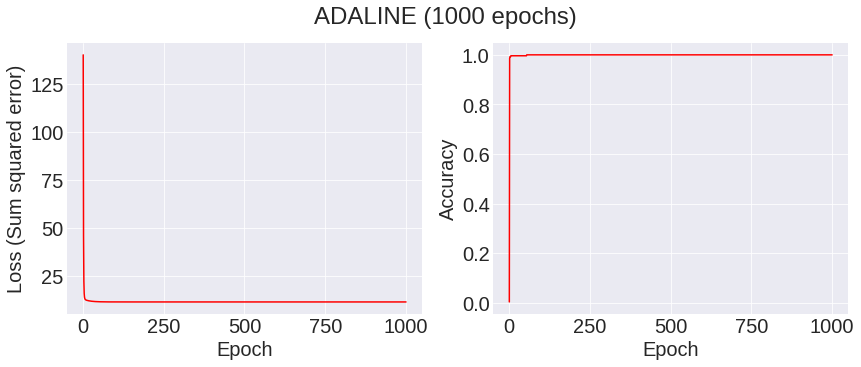

In [14]:
#loading in old faithful data
old_faith_std = pd.read_csv('data/old_faithful.csv')
of_outputs_std = old_faith_std['severe'].to_numpy()
old_faith_std = old_faith_std.drop(['sample','severe'],axis=1).to_numpy(dtype="float128")

#standardizing the old faithful data first over the whole thing then by feature
old_faith_std = (old_faith_std - np.mean(old_faith_std))/np.std(old_faith_std)
old_faith_std = (old_faith_std - np.mean(old_faith_std,axis=0))/np.std(old_faith_std,axis=0)

#running standardized of data through the net
of_net_std = Adaline()
loss_std, acc_std = of_net_std.fit(old_faith_std, of_outputs_std)
print(f'The end-of-training loss / accuracy are\n{loss_std[-1]} / {acc_std[-1]}.')

#plotting loss and accuracy
plot_adaline_train(of_net_std, loss_std, acc_std)


#### Questions

**Question 5.** Explain the similarities/differences in loss and accuracy curves between these plots and those that you made in Task 1.

#### Answers

5. Loss and accuracy are significantly better than in Task 1. Loss was approximately halved while accuracy was improved to 99%. Furthermore, with the standardized data, the loss decreased faster over the epochs, resulting in a sharper drop in loss in the left figure. Similarly, the accuracy improved very quickly, with sharp jumps in accuracy occurring in the earliest 100 epochs.

### 2c. Visualize class boundaries

For this subtask, you will plot the boundary between points (`eruptions`, `waiting` feature pairs) that get classified as severe (+1) or not (-1). To get there, fill in the blanks and answer the questions below.

In [15]:
# Print your learned wts here
print(f'Learned weights from standardized Old Faithful data are: \n{of_net_std.get_wts()}')

Learned weights from standardized Old Faithful data are: 
[0.279 0.704 0.229]


 #### Questions

**Question 6.** What is the meaning of each of the above learned weights with respect to the variables/features in the dataset? Hint: Look at your `net_in` equation, look at the features that you feed into the model, look at the scatterplot you made in 1b, think about what features are present in a single training sample.

**Question 7.** Which feature / weight index corresponds to the "y axis value" in your scatterplot from 1b?

#### Answers

6. The features we fed into the model are 'eruptions' and 'waiting', specifying the duration of eruptions and waiting time in between eruptions. If we're predicting if a geyser is severe or not, we need to take into account both the frequency of eruptions and their duration. Dropping the bias and judging the weight for each feature, 0.704 for duration and 0.229 for time between eruptions, we can see that the duration of each eruption has more of a bearing on severity than the time between eruptions. We know these weights correspond directly to the features because of the formula of the net_in equation, where we directly mutiply each feature of the sample by the corresponding weight. 


7. Wait duration, the weight at wts[2] is on the y axis of the scatter plot.

#### Transform weights for plotting

The class boundary equation is $0 = w_0 + w_1 \times x_i + w_2 \times y_i$ for sample $i$ in our data ($i$ goes to 272). But to plot it, we need an equation that looks like $y_i = m \times x_i + b$ where $m$ and $b$ are some combinations of our weights.

- Scale the weights so that the one corresponding to the "y value" is set to 1, then solve for $y$ (*It might be helpful to work this out by hand*). Once you do, adjust the sign/scale of your weights in code so they match up with the equation you wrote out by hand ( of form $y_i = m \times x_i + b$).
- Once you're done, have the cell below print your transformed weights.

0 = 0.279 + 0.704x + 0.229y

(In y=mx+b:)

y = -1.2183406113537119x - 3.0742358078602616

In [16]:
transformed_wts = of_net_std.get_wts() / of_net_std.get_wts()[2]
print(f' Transformed Weights: {transformed_wts}')

 Transformed Weights: [1.221 3.076 1.   ]


- In the cell below, sample 50 equally spaced x values from -1.5 to 1.5 for plotting the class boundary. Given the `x_i` values, generate `y_i` values using the equation $y_i = m \times x_i + b$ (using your transformed weights from above). 

**Executing the code below should produce a graph that clearly shows this class boundary superimposed on your data scatter plot.**

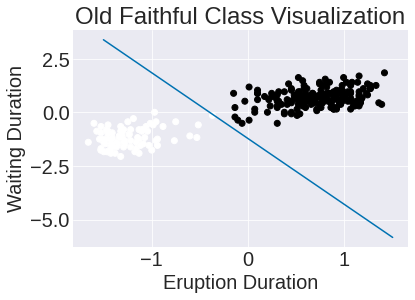

In [30]:
x_i = np.linspace(-1.5, 1.5, 50)
y_i = -x_i*transformed_wts[1] - transformed_wts[0]

plt.scatter(x=old_faith_std[:,0], y=old_faith_std[:,1], c=of_outputs_std)
plt.xlabel("Eruption Duration")
plt.ylabel("Waiting Duration")
plt.title("Old Faithful Class Visualization")
plt.plot(x_i, y_i)
plt.savefig("oldfaith_vis.png",bbox_inches="tight")
plt.show()

## Task 3: Hyperparameters and grid search

This task focuses on the influence of learning rate (a model **hyperparameter**) on the quality of neural network training.

For this task, use the standardized Old Faithful features for input.

### 3a. Influence of learning rate on learning

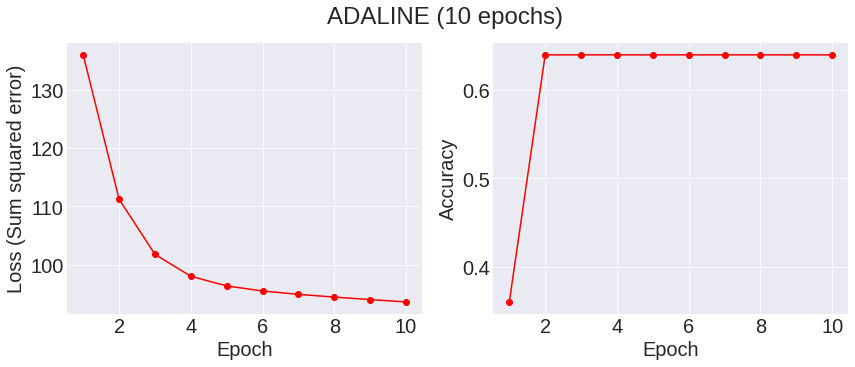

First Loss when Learning Rate is 0.0001: 135.92971167702433
Most Recent Loss when Learning Rate is 0.0001: 93.6423325664508


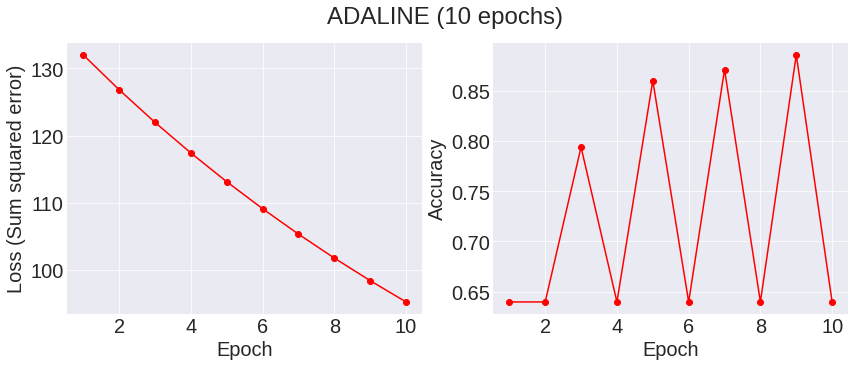

First Loss when Learning Rate is 0.0005: 132.02415304626675
Most Recent Loss when Learning Rate is 0.0005: 95.23515177667446


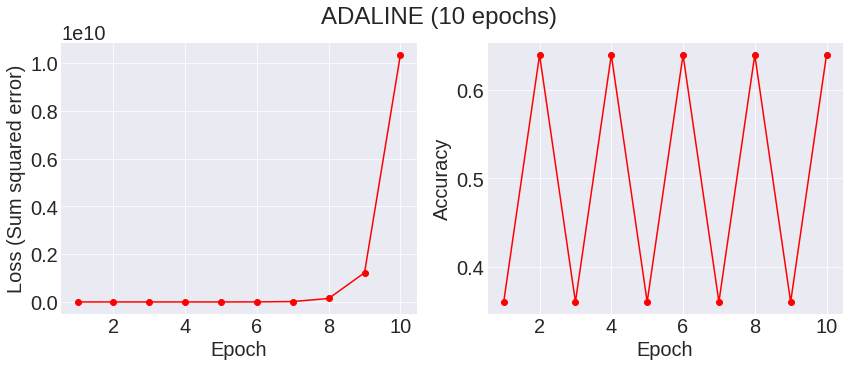

First Loss when Learning Rate is 0.001: 144.41876332434657
Most Recent Loss when Learning Rate is 0.001: 10335477115.277908


In [18]:
# TASK 2 THINGS
net = Adaline()
of = pd.read_csv('data/old_faithful.csv')
of_out = of["severe"].to_numpy()
of_np = of.drop(['sample'],axis=1).to_numpy()

standardized = (of_np - np.mean(of_np, axis=0)) /  np.std(of_np, axis=0)
x = of_np[:,0:1]
y = of_np[:,2]

# TASK 3 THINGS
loss, acc = net.fit(x, y, lr=0.0001, n_epochs=10)
plot_adaline_train(of_net, loss, acc, plotMarkers=True)
print("First Loss when Learning Rate is 0.0001:", loss[0])
print("Most Recent Loss when Learning Rate is 0.0001:", loss[-1])

loss, acc = net.fit(x, y, lr=0.0005, n_epochs=10)
plot_adaline_train(of_net, loss, acc, plotMarkers=True)
print("First Loss when Learning Rate is 0.0005:", loss[0])
print("Most Recent Loss when Learning Rate is 0.0005:", loss[-1])

loss, acc = net.fit(x, y, lr=0.001, n_epochs=10)
plot_adaline_train(of_net, loss, acc, plotMarkers=True)
print("First Loss when Learning Rate is 0.001:", loss[0])
print("Most Recent Loss when Learning Rate is 0.001:", loss[-1])

#### Questions

**Question 8.** Make small changes to the learning rate hyperparameter above. How does it affect the loss?

**Question 9.** What happens if the learning rate is increased by several orders of magnitude? How does it affect the loss? Can you explain why?

#### Answers

8. The three loss graphs show that as the learning rate gets smaller, the loss function stabilizes over time. In all three graphs, the loss starts out around 134, but each graph has a different final loss. The final loss for the first graph and lowest learning rate is about 94. The first graph also has a nice curve that doesn't change much over time. The final loss for the second graph and middle learning rate is about 98, which is somewhat close to the final loss of the first graph. However, the shape of the second graph is a lot more linear than the shape of the first graph. A consequence of this is that, for the same number of epochs, the loss at a given epoch is likely higher in the second graph than in the first graph. The final loss for the third graph is an astronomical 7,892,948,910 and has a shape opposite to that of the first graph. Here, the loss increases over time and more sharply increases with the number of epochs. This suggests that, for the third graph and the lowest learning rate, the loss does not converge and instead diverges.
9. The difference between the first and third sets of graphs is separated by one order of magnitude, with the first graph having a learning rate of 0.0001 and the third graph having a learning rate of 0.001. For the graphs of loss over time, the shapes of the graphs are almost reflections of one another. The first loss graph has a sharp decrease at the start and tends toward convergence, while the third loss graph has little to no increase at the start and then tends towards divergence as loss increases. The reason why the loss is converging toward a global minimum at the smaller learning rate and diverging at the larger learning rate is because of how the learning rate allows the neural network to traverse the loss curve as a whole. Since the loss is derived from the sum of squares error, the shape of the loss curve is a parabola and the ideal loss lies at the global minimum of the parabola. After the gradient decides which direction leads toward the global minimum, the learning rate decides how far to travel in that direction. By having a small learning rate, the steps toward the global minimum are made smaller and the neural network is not likely to overstep and miss the global minimum. By having a large learning rate, the chance of the neural network missing the global minimum increase.

### 3b. Grid search

How can we determine a "good" value of the learning rate that doesn't result in pathological training behavior? Before, we were just guessing / eye-balling it. 

One common, simple approach is to perform a **grid search** through the parameter space. We select with a lower bound value for the parameter and walk through the parameter space in equal steps until we hit a upper bound value. After the search concludes, we set the parameter value for "real simulations" to the value that "worked best" according to some criteria we're interested in optimizing during the grid search.

#### Todo

Use grid search to find the highest learning rate that still lowers loss as a function of epoch (i.e. below this value, the loss decreases as a function of epoch, above this critical value, loss increases as a function of epoch). Find the value with precision of at least 1e-3 (10^-3). **Write all your code below and the learning rate that you find in the cell below** — do NOT modify the `Adaline` class.

**Tips:**
- Define lower and upper bound values for the parameter search, informed by your explorations in 3a.
- Define a step size at least as small as your starting value. Your simulation shouldn't last more a few seconds.
- Keep the number of epochs small (e.g. 10) to keep simulation time reasonable
- Remember that you are outputting the entire loss history when you execute `fit`.


In [19]:
# define lower and upper bounds, step size, number of epochs, and an initial best loss try a seed
np.random.seed(0)
lo = 0.00001
hi = 0.0001
step = 0.00001
iterations = 50
best_loss = 1000

for e in range(iterations):
    loss, acc = net.fit(x, y, lr=lo, n_epochs=10)
    if loss[-1] < best_loss:
        print(f"The best loss is {loss[-1]} when the learning rate is {lo}")
        best_loss = loss[-1]
        lo += step
    e += 1

The best loss is 114.78303686265174 when the learning rate is 1e-05
The best loss is 103.0964848617023 when the learning rate is 2e-05
The best loss is 102.05617323379428 when the learning rate is 3.0000000000000004e-05
The best loss is 98.40511095771126 when the learning rate is 4e-05
The best loss is 96.24833734297158 when the learning rate is 5e-05
The best loss is 95.39168014447773 when the learning rate is 6e-05
The best loss is 95.24836979146147 when the learning rate is 7.000000000000001e-05
The best loss is 94.92758165786418 when the learning rate is 8e-05
The best loss is 92.58168537610663 when the learning rate is 9e-05
The best loss is 92.517910863165 when the learning rate is 0.0001
The best loss is 92.4364149395141 when the learning rate is 0.00011
The best loss is 92.2890448824993 when the learning rate is 0.00012
The best loss is 91.96839583862362 when the learning rate is 0.00013000000000000002


#### Questions

**Question 10.** What is the critical learning rate value above which loss starts to increase?

#### Answers

10. The critical learning rate is about 0.00013.